Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [364]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib



`%matplotlib` prevents importing * from pylab and numpy


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

W: [ 3.99951172] [[ -9.99707031e-01  -2.92968750e-04]]
Dual koef [[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]]

SV: [[ 5.  2.]
 [ 5.  4.]
 [ 3.  2.]]

Width: 1.99921875


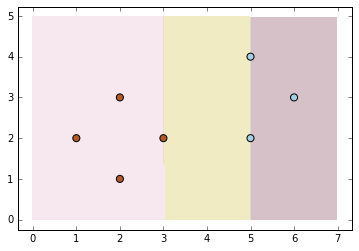

In [365]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

model = SVC(kernel='linear')
model.fit(seven_X, seven_y)

print 'W:', model.intercept_, model.coef_
print 'Dual koef', model.dual_coef_
print '\nSV:', model.support_vectors_

print '\nWidth:', 2 * min(abs(model.decision_function(seven_X)))


mlutils.plot_2d_svc_problem(seven_X, seven_y, svc=model)

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [374]:
from sklearn.metrics import hinge_loss

#print 'SKlearn hinge:', hinge_loss(seven_y, model.decision_function(seven_X))

def hinge(model, x,  y):
    return max(0, 1 - y * model.decision_function(x))

x1 = np.array([3, 2]).reshape(1, -1)
x2 = np.array([3.5, 2]).reshape(1, -1)
x3 = np.array([4, 2]).reshape(1, -1)
    
print 'Hinge:', hinge(model, x1, [1]), hinge_loss([1], model.decision_function(x1))
print 'Hinge:', hinge(model, x2, [1]), hinge_loss([1], model.decision_function(x2))
print 'Hinge:', hinge(model, x3, [-1]), hinge_loss([-1], model.decision_function(x3))

Hinge: [ 0.00019531] 1.9998046875
Hinge: [ 0.50004883] 1.49995117188
Hinge: [ 1.00009766] 1.00009765625


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [20]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Acc: 1.0


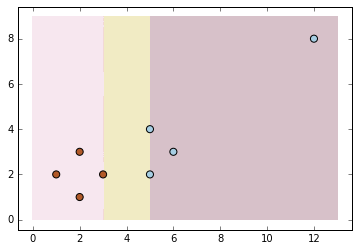

Acc: 0.875


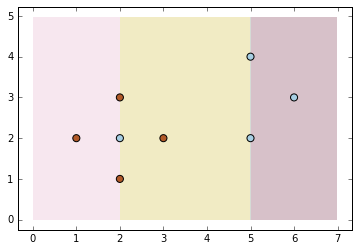

In [24]:
model = SVC(kernel='linear')
model.fit(outlier_X, outlier_y)

mlutils.plot_2d_svc_problem(outlier_X, outlier_y, svc=model)
print 'Acc:', accuracy_score(outlier_y, model.predict(outlier_X))
plt.show()

model = SVC(kernel='linear')
model.fit(unsep_X, unsep_y)

mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc=model)
print 'Acc:', accuracy_score(unsep_y, model.predict(unsep_X))
plt.show()

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

In [32]:
import itertools

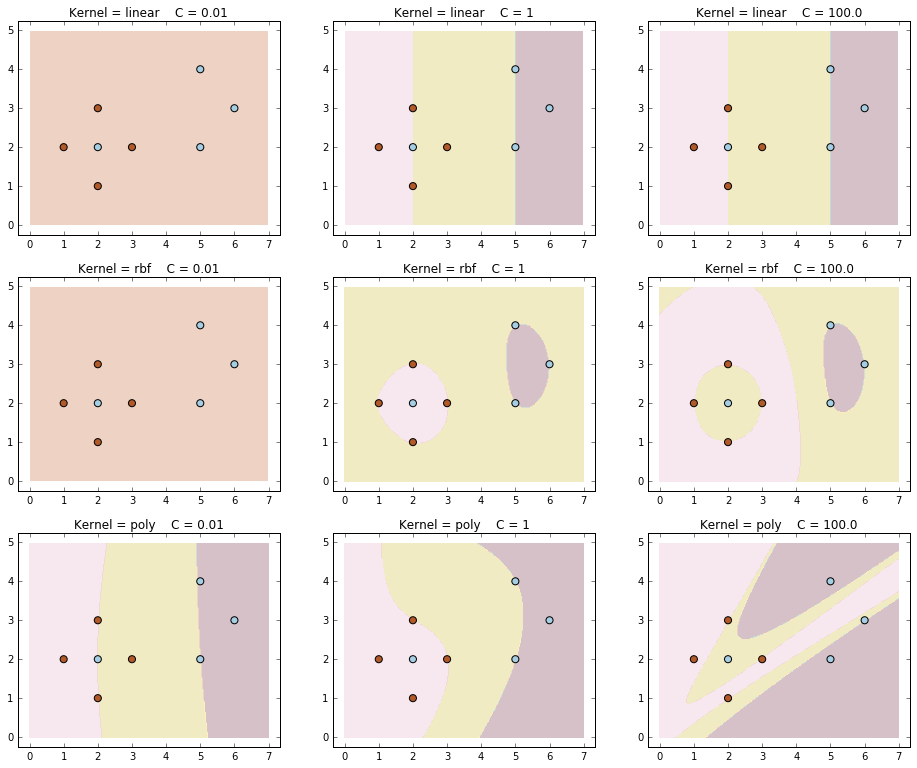

In [34]:
kernels = ['linear', 'rbf', 'poly']
Cs = [1e-2, 1, 1e2]

i = 1
figure(num=None, figsize=(16, 13), dpi=120, facecolor='w', edgecolor='k')

for kernel, C in itertools.product(kernels, Cs):
    model = SVC(kernel=kernel, C=C)
    model.fit(unsep_X, unsep_y)
    
    plt.subplot(3, 3, i)
    mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc=model)
    plt.title('Kernel = {0}    C = {1}'.format(kernel, C))
    i += 1

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [193]:
from sklearn.metrics import accuracy_score, zero_one_loss

exp_space = lambda x1, x2 :[2**i for i in range(x1, x2+1)]

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    Cs = exp_space(c1, c2)
    gammas = exp_space(g1, g2)
    
    result = []
    min_loss = 100
    errors_val = []
    errors_train = []
    
    for C, gamma in itertools.product(Cs, gammas):
        model = SVC(C=C, gamma=gamma)
        model.fit(X_train, y_train)
        
        loss_train = zero_one_loss(y_train, model.predict(X_train))
        loss_val = zero_one_loss(y_validate, model.predict(X_validate))
        
        if loss_val < min_loss:
            min_loss = loss_val
            result = [model, C, gamma, loss_val]
            
        errors_val.append(loss_val)
        errors_train.append(loss_train)
        
    error_matrix_val = np.array(errors_val).reshape(c2-c1+1, g2-g1+1)  
    error_matrix_train = np.array(errors_train).reshape(c2-c1+1, g2-g1+1)
    
    best_paramas = (result[1], result[2])
    return error_matrix_train, error_matrix_val,best_paramas if error_surface else best_paramas

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

In [194]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

d1_x, d1_y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=2)
d2_x, d2_y = make_classification(n_samples=200, n_features=1000, n_redundant=0, n_clusters_per_class=2, n_informative=1000)

d1_train_x, d1_val_x, d1_train_y, d1_val_y = train_test_split(d1_x, d1_y, test_size=0.5)
d2_train_x, d2_val_x, d2_train_y, d2_val_y = train_test_split(d2_x, d2_y, test_size=0.5)

sur1_tr, sur1_val, b1 = grid_search(d1_train_x, d1_val_x, d1_train_y, d1_val_y, (-5, 15), (-15,3), error_surface=True)
sur2_tr, sur2_val, b2 = grid_search(d2_train_x, d2_val_x, d2_train_y, d2_val_y, (-5, 15), (-15,3), error_surface=True)

Simple: (0.25, 2)
Complex: (0.03125, 3.0517578125e-05)


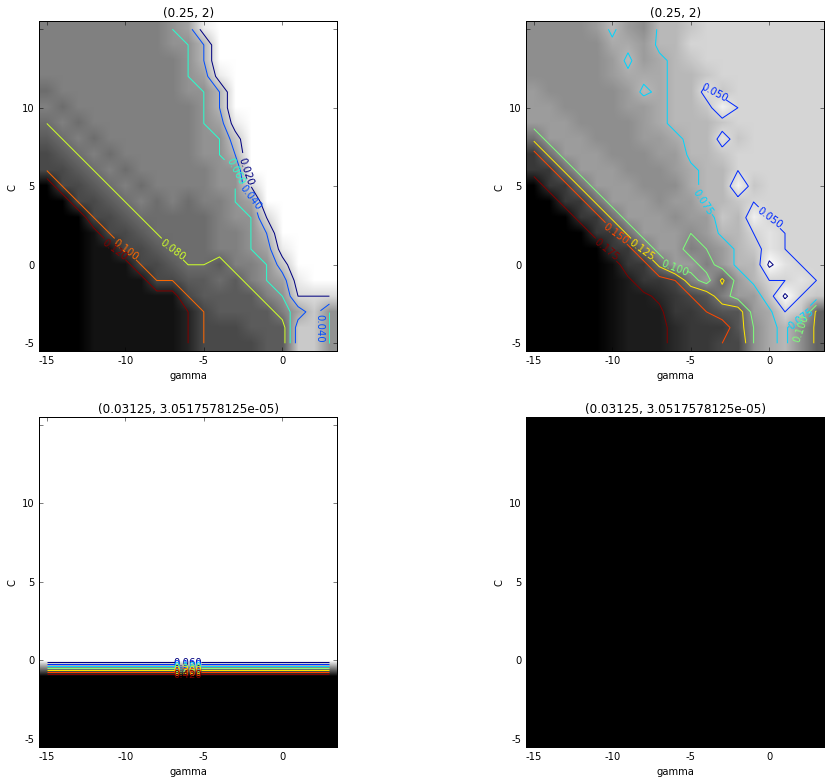

In [210]:
figure(num=None, figsize=(16, 13), dpi=120, facecolor='w', edgecolor='k')

print 'Simple:', b1
print 'Complex:', b2

for i, surface in enumerate([sur1_tr, sur1_val, sur2_tr, sur2_val]):
    plt.subplot(2, 2, i+1)
    mlutils.plot_error_surface(surface, (-5, 15), (-15, 3))
    plt.title(b1 if i < 2 else b2)

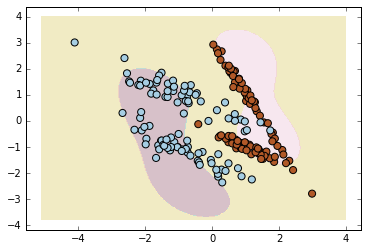

In [211]:
model = SVC(C=b1[0], gamma=b1[0])
model.fit(d1_x, d1_y)
mlutils.plot_2d_svc_problem(d1_x, d1_y, svc=model)

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

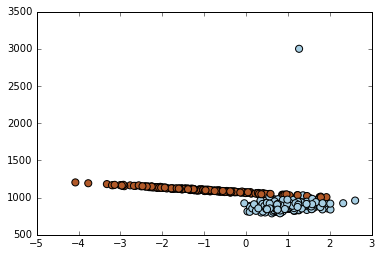

In [246]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

(array([   4.,   46.,  128.,   73.,   30.,   44.,   48.,   41.,   48.,
          25.,    6.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  788.52225153,   832.7518065 ,   876.98136147,   921.21091644,
          965.44047141,  1009.67002638,  1053.89958135,  1098.12913632,
         1142.35869129,  1186.58824626,  1230.81780123,  1275.04735619,
         1319.27691116,  1363.50646613,  1407.7360211 ,  1451.96557607,
         1496.19513104,  1540.42468601,  1584.65424098,  1628.88379595,
         1673.11335092,  1717.34290589,  1761.57246086,  1805.80201583,
         1850.0315708 ,  1894.26112577,  1938.49068074,  1982.7202357 ,
         2026.94979067,  2071.17934564,  2115.40890061,  2159.63845558,
         2203.86801055, 

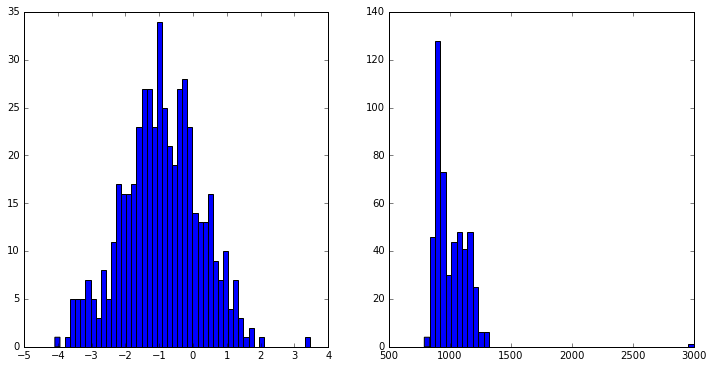

In [285]:
figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.hist(X[:,0], bins=50)

plt.subplot(1,2,2)
plt.hist(X[:,1], bins=50)

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

(array([   4.,   46.,  128.,   73.,   30.,   44.,   48.,   41.,   48.,
          25.,    6.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

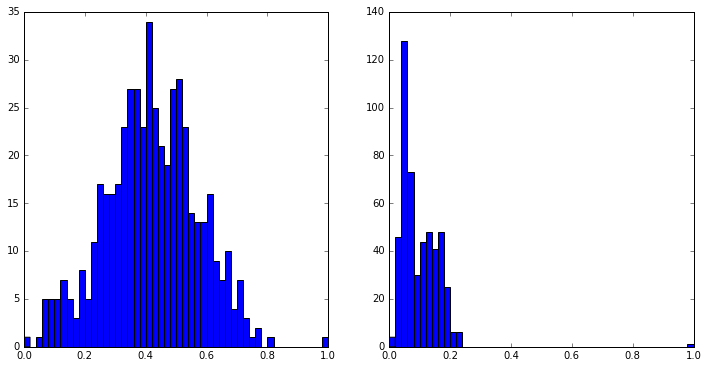

In [287]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_min_max = scaler.fit_transform(X)

figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.hist(X_min_max[:,0], bins=50)

plt.subplot(1,2,2)
plt.hist(X_min_max[:,1], bins=50)

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

(array([   4.,   46.,  128.,   73.,   30.,   44.,   48.,   41.,   48.,
          25.,    6.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ -1.48679437,  -1.18592786,  -0.88506135,  -0.58419484,
         -0.28332833,   0.01753818,   0.31840469,   0.61927121,
          0.92013772,   1.22100423,   1.52187074,   1.82273725,
          2.12360376,   2.42447027,   2.72533678,   3.02620329,
          3.3270698 ,   3.62793631,   3.92880282,   4.22966933,
          4.53053584,   4.83140235,   5.13226886,   5.43313537,
          5.73400188,   6.03486839,   6.3357349 ,   6.63660141,
          6.93746792,   7.23833443,   7.53920094,   7.84006746,
          8.14093397,   8.44180048,   8.74266699,   9.0435335 ,
          9.34440001,   

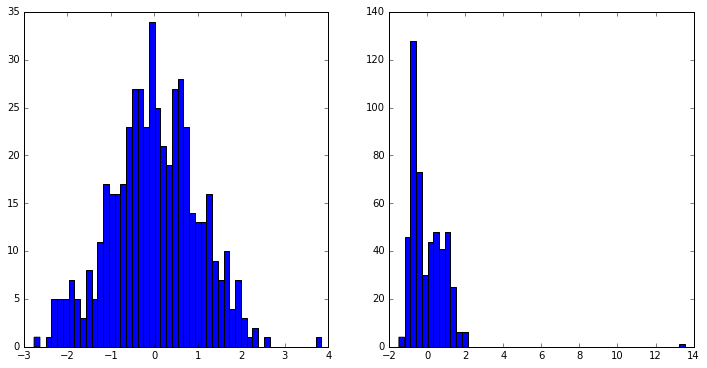

In [288]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.hist(X_standard[:,0], bins=50)

plt.subplot(1,2,2)
plt.hist(X_standard[:,1], bins=50)

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [379]:
accs = []
accs_MM = []
accs_SS = []

for i in range(30):
    X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)
    
    # NON SCALED
    model = SVC()
    model.fit(X_train, y_train)
    accs.append(accuracy_score(y_val, model.predict(X_val)))
    
    # STANDARD SCALER
    scaler = StandardScaler()
    scaler.fit_transform(X_train)
    
    X_val_SS = X_val
    X_val_SS = scaler.transform(X_val_SS)
    accs_SS.append(accuracy_score(y_val, model.predict(X_val_SS)))
    
    # MINMAX SCALER
    scaler = MinMaxScaler()
    scaler.fit_transform(X_train)
    
    X_val_MM = X_val
    X_val_MM = scaler.transform(X_val_MM)
    accs_MM.append(accuracy_score(y_val, model.predict(X_val_MM)))
    

print 'Non-sacled:', sum(accs)/len(accs)
print 'Standard scaler:', sum(accs_SS)/len(accs_SS)
print 'MinMax scaler:', sum(accs_MM)/len(accs_MM)

Non-sacled: 0.9456
Standard scaler: 0.8564
MinMax scaler: 0.577866666667


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [282]:
from scipy.linalg import norm
from bisect import insort

class KNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.data = []
        
    def fit(self, X_train, y_train):
        for x, y in zip(X_train, y_train):
            self.data.append([x, y])
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            neighbours = self.__get_n_neighbours(x)
            y_pred.append(self.__get_class(neighbours))
            
        return np.array(y_pred)
            
            
    def __get_n_neighbours(self, x):
        distances = []
        for pair in self.data:
            x2 = pair[0]
            y = pair[1]
            
            distance = self.__get_distance(x, x2)
            distances.append([y, distance])
        
        distances.sort(key=lambda r: r[1])
        neighbours = distances[:self.n_neighbors]
        return [neighbour[0] for neighbour in neighbours]
    
    def __get_class(self, neighbours):
        return max(set(neighbours), key=neighbours.count)
    
    def __get_distance(self, x1, x2):
        return norm(x2-x1)

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

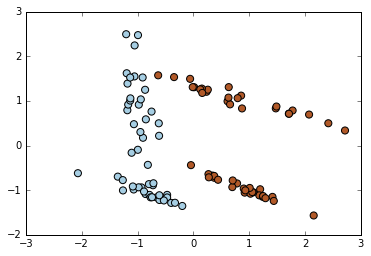

In [300]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

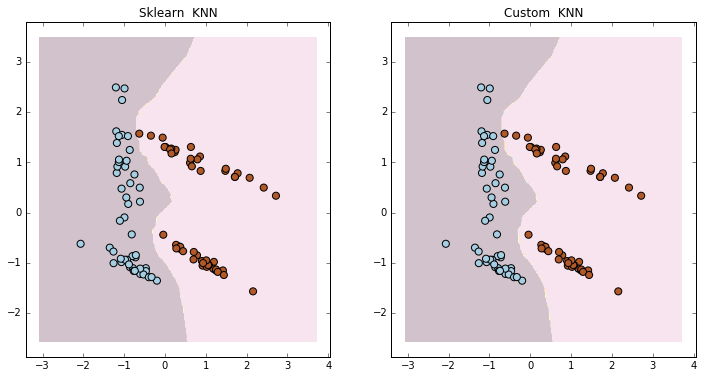

In [301]:
from sklearn.neighbors import KNeighborsClassifier
figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(X_art, y_art)
plt.subplot(1, 2, 1)
plt.title('Sklearn  KNN')
mlutils.plot_2d_clf_problem(X_art, y_art, h=model.predict)

model = KNN()
model.fit(X_art, y_art)
plt.subplot(1, 2, 2)
plt.title('Custom  KNN')
mlutils.plot_2d_clf_problem(X_art, y_art, h=model.predict)

#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

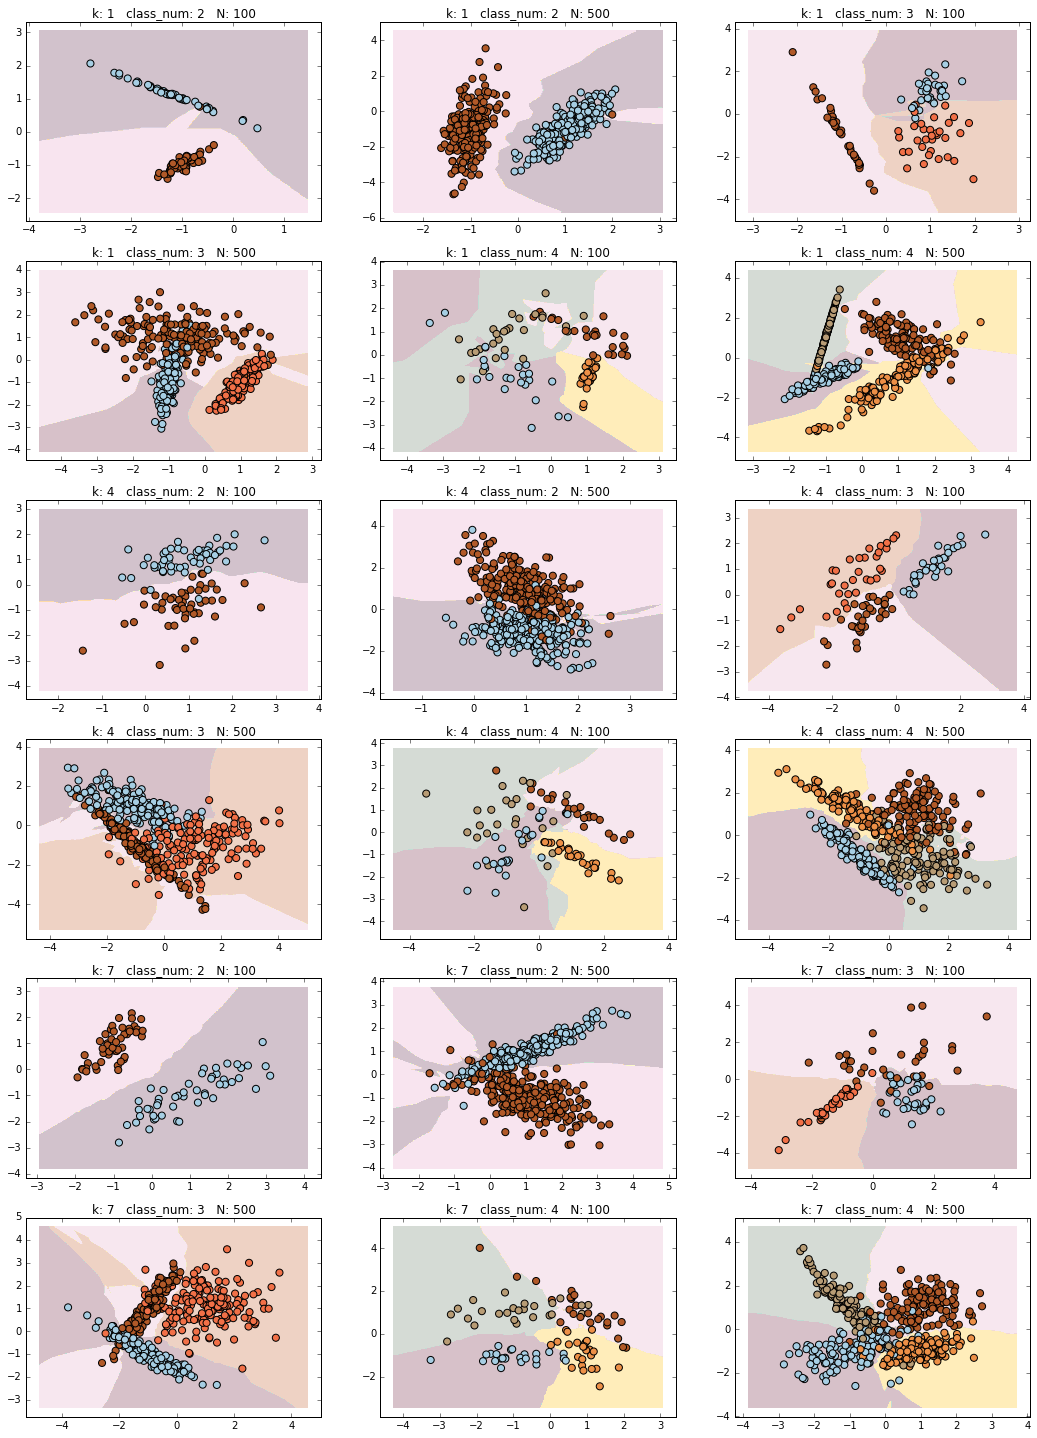

In [314]:
figure(num=None, figsize=(18, 25), dpi=120, facecolor='w', edgecolor='k')

i = 0
for k in range(1, 9, 3):
    for class_num in [2, 3, 4]:
        for N in [100, 500]:
            i += 1
            plt.subplot(6, 3, i)
            plt.title('k: {0}   class_num: {1}   N: {2}'.format(k, class_num, N))
            X, y = make_classification(n_samples=N, n_features=2, n_classes=class_num, n_redundant=0,
                                       n_clusters_per_class=1, n_informative=2)
            
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X, y)
            mlutils.plot_2d_clf_problem(X, y, h=model.predict)

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [325]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    
    min_loss = 1e5
    best_k = 0
    train_errors = []
    test_errors = []
    for k in range(k_range[0], k_range[1]):
        
        losses_train = []
        losses_test = []
        for i in range(n_trials):
            
            X, y = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes,
                                       n_informative=n_informative,n_redundant=0, n_clusters_per_class=1)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            
            loss = zero_one_loss(y_test, model.predict(X_test))
            losses_test.append(loss)
            
            loss = zero_one_loss(y_train, model.predict(X_train))
            losses_train.append(loss)

        avg_loss_test = sum(losses_test)/len(losses_test)
        avg_loss_train = sum(losses_train)/len(losses_train)
        
        if avg_loss_test < min_loss:
            min_loss = avg_loss_test
            best_k = k
        
        
        train_errors.append(avg_loss_train)
        test_errors.append(avg_loss_test)
        
    return (best_k, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

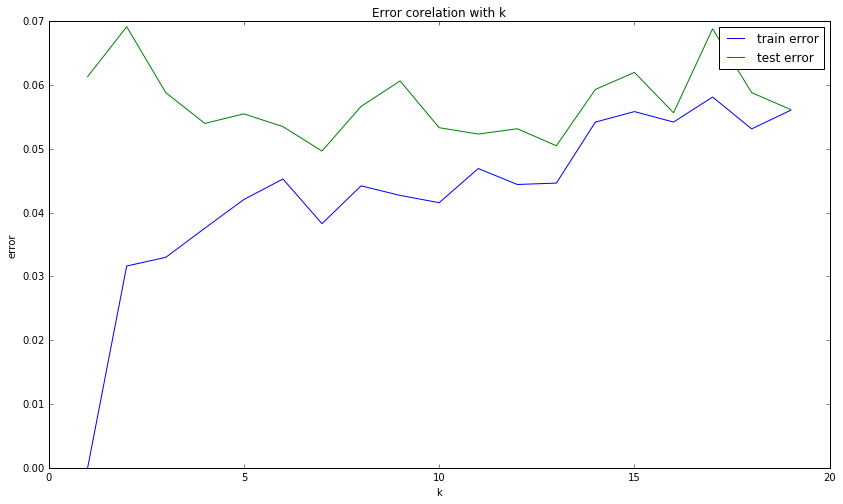

In [376]:
figure(num=None, figsize=(14, 8), dpi=120, facecolor='w', edgecolor='k')

k, train_error, test_error = knn_eval(n_instances=200)

plt.plot(range(1, 20), train_error)
plt.plot(range(1, 20), test_error)
plt.legend(['train error', 'test error'])
plt.title('Error corelation with k')
plt.xlabel('k')
plt.ylabel('error')

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

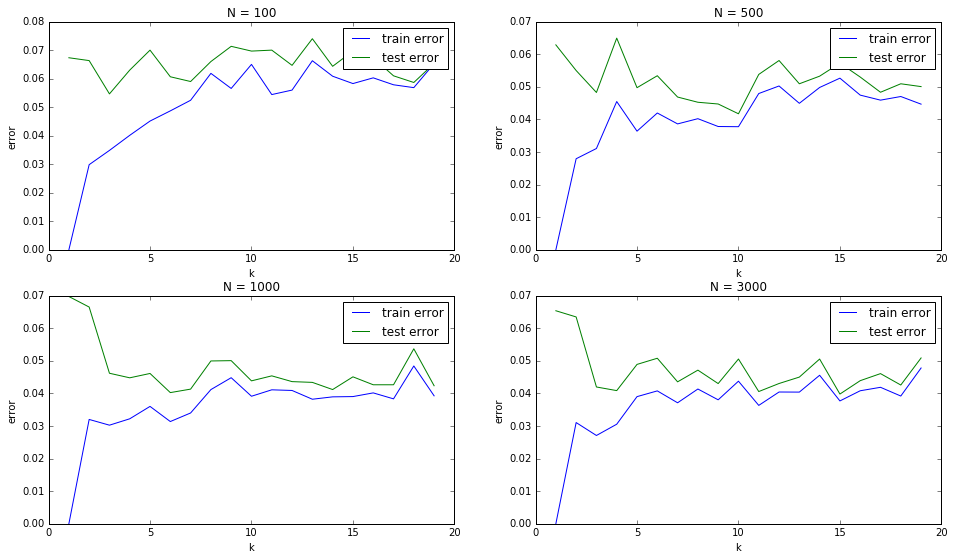

In [340]:
figure(num=None, figsize=(16, 9), dpi=120, facecolor='w', edgecolor='k')
for i, N in enumerate([100, 500, 1000, 3000]):
    k, train_error, test_error = knn_eval(n_instances=N)

    plt.subplot(2, 2, i+1)
    plt.plot(range(1, 20), train_error)
    plt.plot(range(1, 20), test_error)
    plt.legend(['train error', 'test error'])
    plt.title('N = {0}'.format(N))
    plt.xlabel('k')
    plt.ylabel('error')

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [ ]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

Xd = deepcopy(X)
yd = deepcopy(y)

Xd[:,1] = Xd[:,1]*100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3)

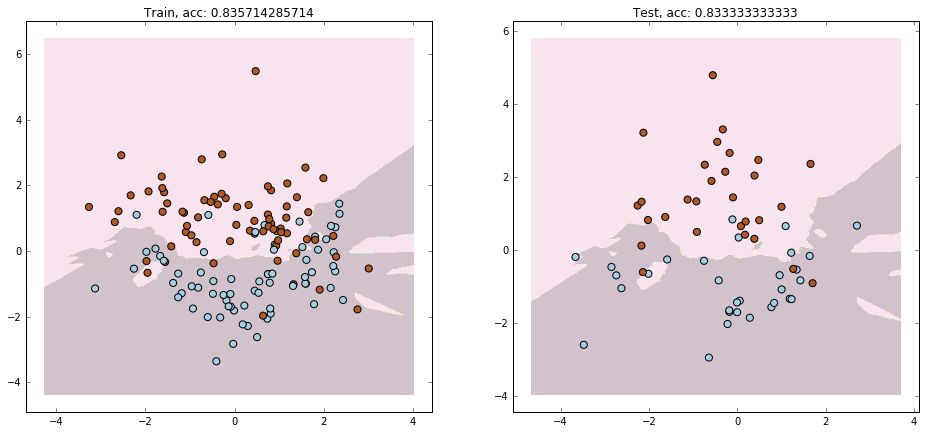

In [354]:
figure(num=None, figsize=(16, 7), dpi=120, facecolor='w', edgecolor='k')
model = KNeighborsClassifier()
model.fit(X_train, y_train)

plt.subplot(1, 2, 1)
acc_tr = accuracy_score(y_train, model.predict(X_train))
plt.title('Train, acc: {0}'.format(acc_tr))
mlutils.plot_2d_clf_problem(X_train, y_train, h=model.predict)


plt.subplot(1, 2, 2)
acc_test = accuracy_score(y_test, model.predict(X_test))
plt.title('Test, acc: {0}'.format(acc_test))
mlutils.plot_2d_clf_problem(X_test, y_test, h=model.predict)

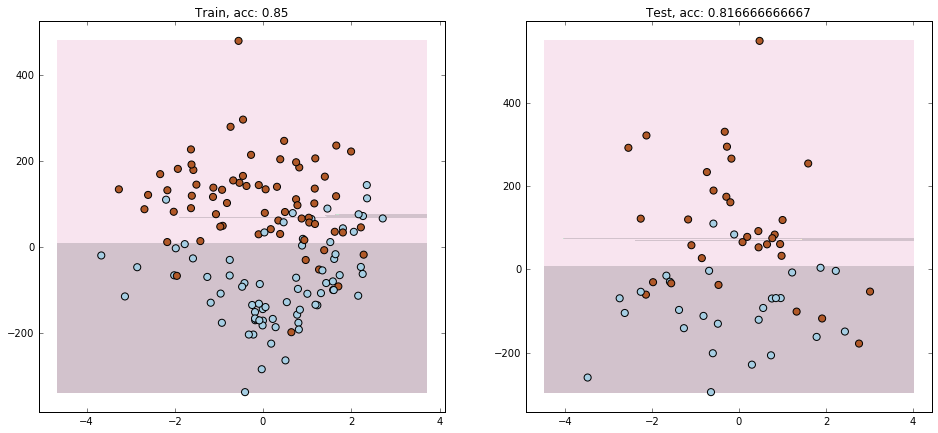

In [358]:
figure(num=None, figsize=(16, 7), dpi=120, facecolor='w', edgecolor='k')
model = KNeighborsClassifier()
model.fit(Xd_train, yd_train)

plt.subplot(1, 2, 1)
acc_tr = accuracy_score(yd_train, model.predict(Xd_train))
plt.title('Train, acc: {0}'.format(acc_tr))
mlutils.plot_2d_clf_problem(Xd_train, yd_train, h=model.predict)


plt.subplot(1, 2, 2)
acc_test = accuracy_score(yd_test, model.predict(Xd_test))
plt.title('Test, acc: {0}'.format(acc_test))
mlutils.plot_2d_clf_problem(Xd_test, yd_test, h=model.predict)

**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

 10 Informative: 0.0992285714286 0.132666666667
5 Informative: 0.175357142857 0.2088


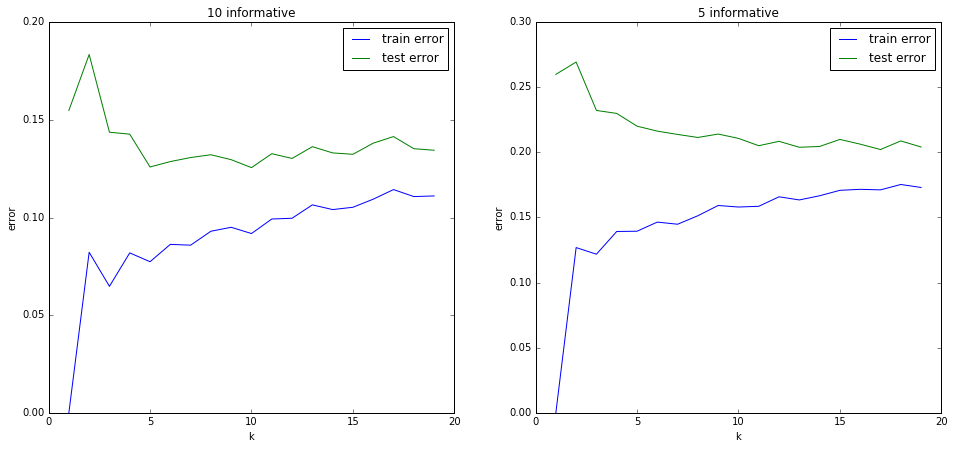

In [378]:
figure(num=None, figsize=(16, 7), dpi=120, facecolor='w', edgecolor='k')

N = 1000
n = 10
K = 5

k, train_error, test_error = knn_eval(n_instances=N, n_features=n, n_classes=5, n_informative=10)
plt.subplot(1, 2, 1)
plt.plot(range(1, 20), train_error)
plt.plot(range(1, 20), test_error)
plt.legend(['train error', 'test error'])
plt.title('10 informative')
plt.xlabel('k')
plt.ylabel('error')

print '10 Informative:', train_error[k], test_error[k]

k, train_error, test_error = knn_eval(n_instances=N, n_features=n, n_classes=5, n_informative=5)
plt.subplot(1, 2, 2)
plt.plot(range(1, 20), train_error)
plt.plot(range(1, 20), test_error)
plt.legend(['train error', 'test error'])
plt.title('5 informative')
plt.xlabel('k')
plt.ylabel('error')

print '5 Informative:', train_error[k], test_error[k]

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?